### Установка пакетов

In [ ]:
%%capture
!pip install opencv-python # *not* opencv-contrib-python
!pip install easyocr
!pip install jiwer
!apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import os
import re
import cv2
import warnings
import numpy as np
import pytesseract
from jiwer import wer, cer
from easyocr import Reader
from pytesseract import Output
from google.colab.patches import cv2_imshow

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
warnings.filterwarnings('ignore')

### Тестовые данные

In [ ]:
%%capture
!unzip test_ocr.zip -d /content/

In [ ]:
true_texts = ['2678373-2661613-9217164/2-46',
    '4612245-2924722-2452397/4-65',
    '4612245-2924722-2452397/4-65',
    '4612245-2924722-2452397/4-65',
    '2723107-5249711-6129993/4-65',
    '2723107-5249711-6129993/4-65',
    '8001513-6472363-1846770/4-65',
    '8001513-6472363-1846770/4-65',
    '6391122-3690641-5274319/1-71',
    '6391122-3690641-5274319/1-71']

len(true_texts)

10

1.jpg
True number: 2678373-2661613-9217164/2-46


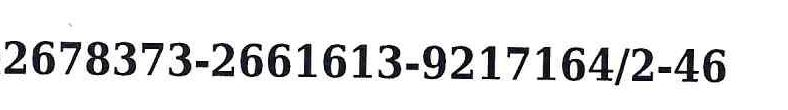


2.jpg
True number: 4612245-2924722-2452397/4-65


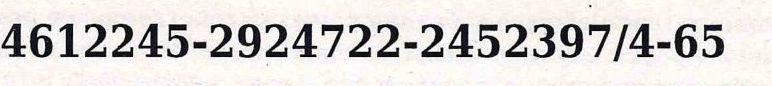


3.jpg
True number: 4612245-2924722-2452397/4-65


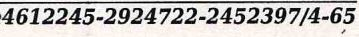


4.jpg
True number: 4612245-2924722-2452397/4-65


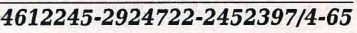


5.jpg
True number: 2723107-5249711-6129993/4-65


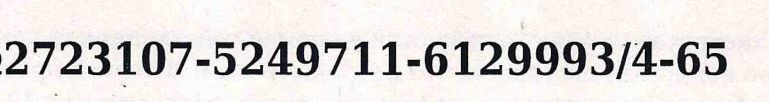


6.jpg
True number: 2723107-5249711-6129993/4-65



7.jpg
True number: 8001513-6472363-1846770/4-65


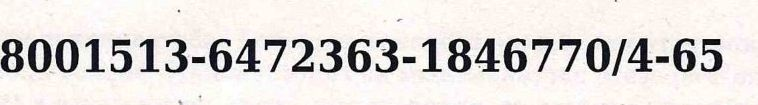


8.jpg
True number: 8001513-6472363-1846770/4-65


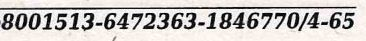


9.jpg
True number: 6391122-3690641-5274319/1-71


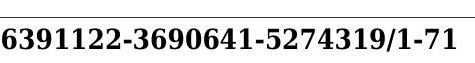


99.jpg
True number: 6391122-3690641-5274319/1-71


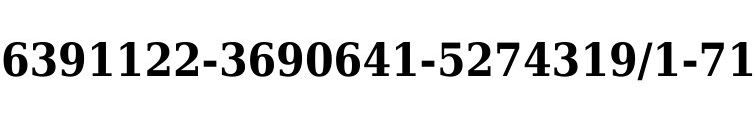

In [ ]:
test_dir = '/content/test_ocr/'
im_names = sorted(os.listdir(test_dir))
for i in range(len(im_names)):
  im_name = im_names[i]
  print(im_name)
  print("True number:", true_texts[i])
  im = cv2.imread(test_dir+im_name)
  cv2_imshow(im)
  print()

### EasyOCR

Результаты распознавания с помощью EasyOCR:

1.jpg


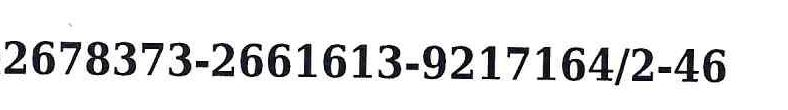

True number: 2678373-2661613-9217164/2-46
EasyOCR: 2678373-2661613-9217164/2-46
WER: 0.0 CER: 0.0

2.jpg


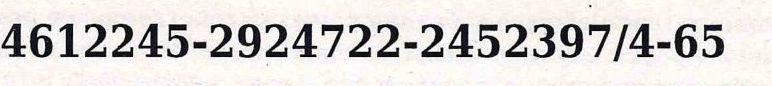

True number: 4612245-2924722-2452397/4-65
EasyOCR: 4612245-2924722-2452397/4-65
WER: 0.0 CER: 0.0

3.jpg


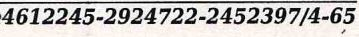

True number: 4612245-2924722-2452397/4-65
EasyOCR: 4612245-2924722-2452397/4-65
WER: 0.0 CER: 0.0

4.jpg


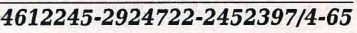

True number: 4612245-2924722-2452397/4-65
EasyOCR: 4612245-2924722-2452397/4-65
WER: 0.0 CER: 0.0

5.jpg


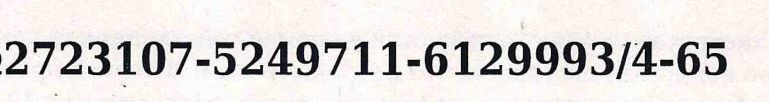

True number: 2723107-5249711-6129993/4-65
EasyOCR: 2723107-5249711-6129993/4-65
WER: 0.0 CER: 0.0

6.jpg


True number: 2723107-5249711-6129993/4-65
EasyOCR: 2723107-5249711-6129993/4-65
WER: 0.0 CER: 0.0

7.jpg


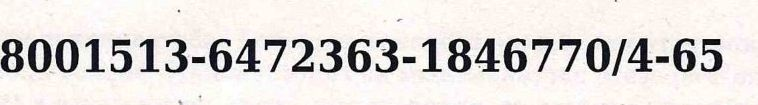

True number: 8001513-6472363-1846770/4-65
EasyOCR: 8001513-6472363-1846770/4-65
WER: 0.0 CER: 0.0

8.jpg


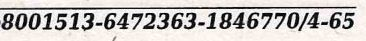

True number: 8001513-6472363-1846770/4-65
EasyOCR: 8001513-6472363-184677074-65
WER: 1.0 CER: 0.03571428571428571

9.jpg


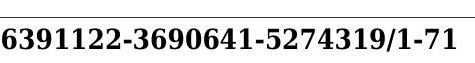

True number: 6391122-3690641-5274319/1-71
EasyOCR: 6391122-3690641-5274319/1-71
WER: 0.0 CER: 0.0

99.jpg


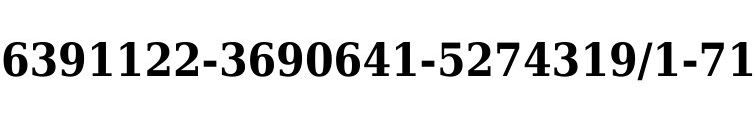

True number: 6391122-3690641-5274319/1-71
EasyOCR: 6391122-3690641-5274319/1-71
WER: 0.0 CER: 0.0



In [ ]:
test_dir = '/content/test_ocr/'
im_names = sorted(os.listdir(test_dir))

reader = Reader(['en'], gpu=False, verbose=False)
wers, cers = [], []
print("Результаты распознавания с помощью EasyOCR:")
print()
for i in range(len(im_names)):
  im_name = im_names[i]
  print(im_name)
  im = cv2.imread(test_dir+im_name)
  cv2_imshow(im)
  print("True number:", true_texts[i])

  res = reader.readtext(im, allowlist='0123456789-/ ')
  res = res[0][1].strip()
  w = wer(true_texts[i], res)
  c = cer(true_texts[i], res)
  wers.append(w)
  cers.append(c)

  print("EasyOCR:", res)
  print("WER:", w, "CER:", c)
  print()

In [ ]:
big_numbers_inds = [0,1,4,6]
big_numbers_wers = np.array(wers)[big_numbers_inds]
print("Среднее значение WER на крупных цифрах (фото):", np.mean(big_numbers_wers))

italics_inds = [2,3,5,7]
italics_wers = np.array(wers)[italics_inds]
print("Среднее значение WER на цифрах курсивом (фото):", np.mean(italics_wers))

Среднее значение WER на крупных цифрах (фото): 0.0
Среднее значение WER на цифрах курсивом (фото): 0.25


In [ ]:

print("Среднее значение WER на всём наборе:", np.mean(wers))
print("Среднее значение CER на всём наборе:", np.round(np.mean(cers), 3))

Среднее значение WER на всём наборе: 0.1
Среднее значение CER на всём наборе: 0.004


### Tesseract

In [ ]:
# список опций psm: https://pyimagesearch.com/2021/11/15/tesseract-page-segmentation-modes-psms-explained-how-to-improve-your-ocr-accuracy/

pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

Результаты распознавания с помощью Tesseract:

1.jpg


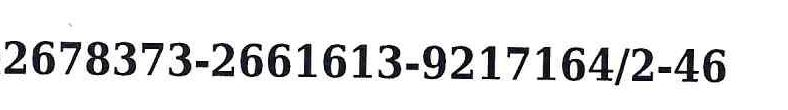

True number: 2678373-2661613-9217164/2-46
Tesseract: 2678373-2661613-9217164/2-46
WER: 0.0 CER: 0.0

2.jpg


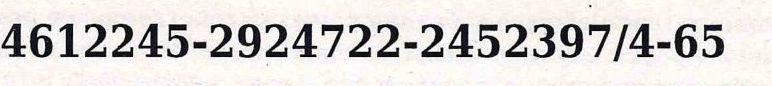

True number: 4612245-2924722-2452397/4-65
Tesseract: 4612245-2924722-2452397/4-65
WER: 0.0 CER: 0.0

3.jpg


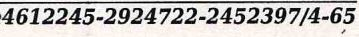

True number: 4612245-2924722-2452397/4-65
Tesseract: 4612245-2924722-2452397/4-65
WER: 0.0 CER: 0.0

4.jpg


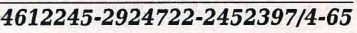

True number: 4612245-2924722-2452397/4-65
Tesseract: 4612245-2924722-2452397/4-65
WER: 0.0 CER: 0.0

5.jpg


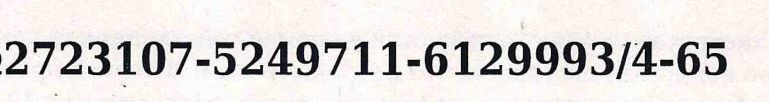

True number: 2723107-5249711-6129993/4-65
Tesseract: 2723107-5249711-6129993/4-65
WER: 0.0 CER: 0.0

6.jpg


True number: 2723107-5249711-6129993/4-65
Tesseract: 2723107-5249711-6129993/4-65
WER: 0.0 CER: 0.0

7.jpg


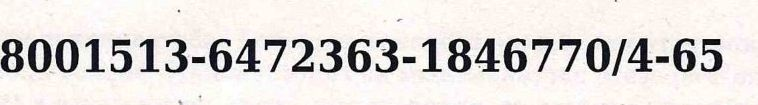

True number: 8001513-6472363-1846770/4-65
Tesseract: 8001513-6472363-1846770/4-65
WER: 0.0 CER: 0.0

8.jpg


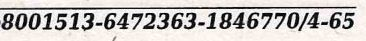

True number: 8001513-6472363-1846770/4-65
Tesseract: 8001513-6472363-1846770/4-65
WER: 0.0 CER: 0.0

9.jpg


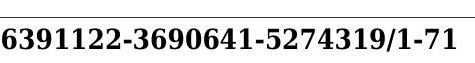

True number: 6391122-3690641-5274319/1-71
Tesseract: 6391122-3690641-5274319/1-71
WER: 0.0 CER: 0.0

99.jpg


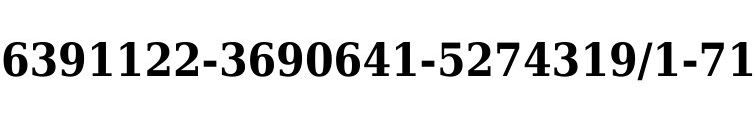

True number: 6391122-3690641-5274319/1-71
Tesseract: 6391122-3690641-5274319/1-71
WER: 0.0 CER: 0.0



In [ ]:
test_dir = '/content/test_ocr/'
im_names = sorted(os.listdir(test_dir))
wers, cers = [], []

print("Результаты распознавания с помощью Tesseract:")
print()
for i in range(len(im_names)):
  im_name = im_names[i]
  print(im_name)
  im = cv2.imread(test_dir+im_name)
  cv2_imshow(im)
  print("True number:", true_texts[i])

  res = pytesseract.image_to_string(im, lang='eng', config='--psm 8 -c tessedit_char_whitelist=0123456789/- ').replace('\n\x0c', '')
  res = res.strip()
  w = wer(true_texts[i], res)
  c = cer(true_texts[i], res)
  wers.append(w)
  cers.append(c)

  print("Tesseract:", res)
  print("WER:", w, "CER:", c)
  print()


In [ ]:
big_numbers_inds = [0,1,4,6]
big_numbers_wers = np.array(wers)[big_numbers_inds]
print("Среднее значение WER на крупных цифрах (фото):", np.mean(big_numbers_wers))

italics_inds = [2,3,5,7]
italics_wers = np.array(wers)[italics_inds]
print("Среднее значение WER на цифрах курсивом (фото):", np.mean(italics_wers))

Среднее значение WER на крупных цифрах (фото): 0.0
Среднее значение WER на цифрах курсивом (фото): 0.0


In [ ]:
print("Среднее значение WER на всём наборе:", np.mean(wers))
print("Среднее значение CER на всём наборе:", np.round(np.mean(cers), 3))

Среднее значение WER на всём наборе: 0.0
Среднее значение CER на всём наборе: 0.0
